 Heart Disease Dataset — EDA and Feature Engineering Only

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Step 1: Load dataset

In [14]:
df = pd.read_csv('Heart_Disease_Prediction.csv')
df.head()


,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [15]:
print('Shape:', df.shape)


Shape: (270, 14)


In [16]:
print('Columns:', df.columns.tolist())
print('\nInfo:')
df.info()

Columns: ['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120', 'EKG results', 'Max HR', 'Exercise angina', 'ST depression', 'Slope of ST', 'Number of vessels fluro', 'Thallium', 'Heart Disease']

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST            

Step 2: Basic Statistics

In [17]:
print('\nSummary statistics:')
print(df.describe(include='all').T)


Summary statistics:
                         count unique      top freq        mean        std  \
Age                      270.0    NaN      NaN  NaN   54.433333   9.109067   
Sex                      270.0    NaN      NaN  NaN    0.677778   0.468195   
Chest pain type          270.0    NaN      NaN  NaN    3.174074    0.95009   
BP                       270.0    NaN      NaN  NaN  131.344444  17.861608   
Cholesterol              270.0    NaN      NaN  NaN  249.659259  51.686237   
FBS over 120             270.0    NaN      NaN  NaN    0.148148   0.355906   
EKG results              270.0    NaN      NaN  NaN    1.022222   0.997891   
Max HR                   270.0    NaN      NaN  NaN  149.677778  23.165717   
Exercise angina          270.0    NaN      NaN  NaN     0.32963   0.470952   
ST depression            270.0    NaN      NaN  NaN        1.05    1.14521   
Slope of ST              270.0    NaN      NaN  NaN    1.585185    0.61439   
Number of vessels fluro  270.0    NaN      

Missing values

In [18]:
print('\nMissing values:')
print(df.isnull().sum())


Missing values:
Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64


Step 3: Target Variable Check

In [19]:
possible_targets = ['target', 'HeartDisease', 'heart_disease', 'output']
for t in possible_targets:
  if t in df.columns:
    target_col = t
    break
  else:
    target_col = df.columns[-1]


print(f'Using target column: {target_col}')
print(df[target_col].value_counts())

Using target column: Heart Disease
Heart Disease
Absence     150
Presence    120
Name: count, dtype: int64


Numeric distribution

In [20]:
for col in numeric_cols:
  plt.figure(figsize=(6,3))
  sns.histplot(df[col], kde=True, bins=20)
  plt.title(f'Distribution of {col}')
  plt.show()

NameError: name 'numeric_cols' is not defined

Boxplots

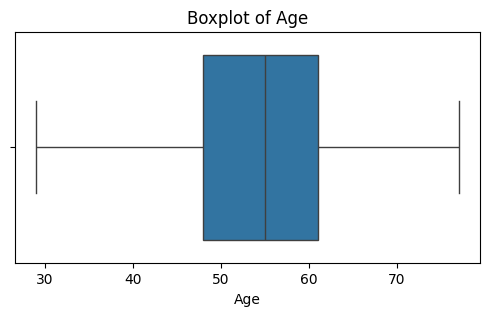

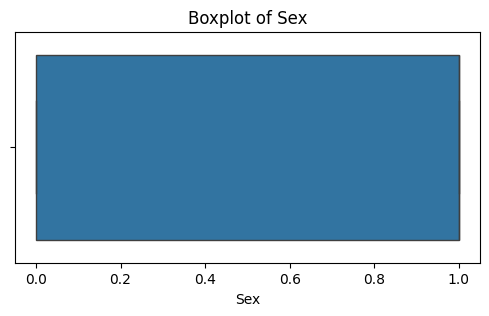

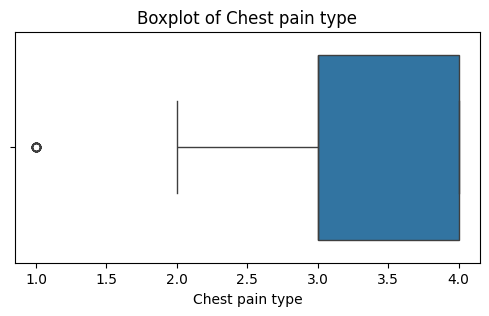

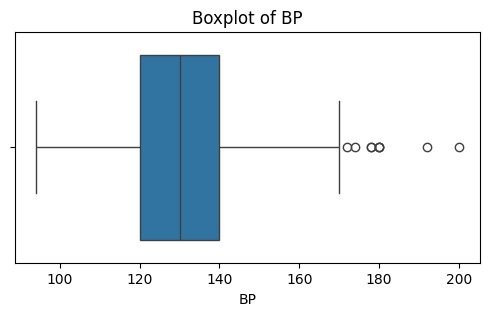

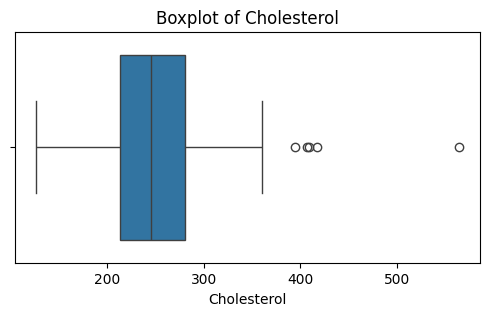

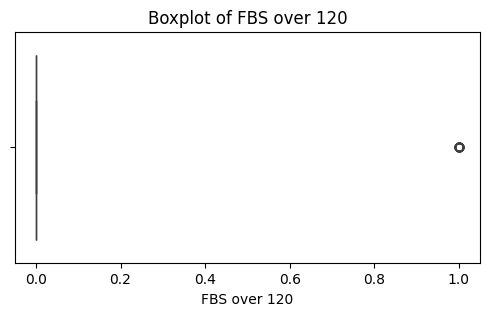

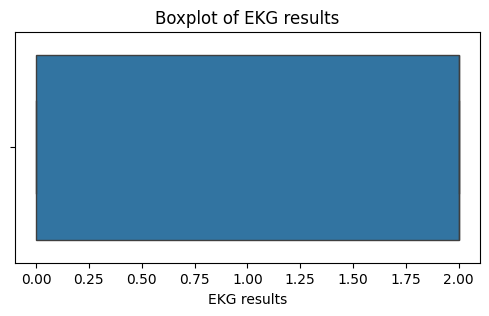

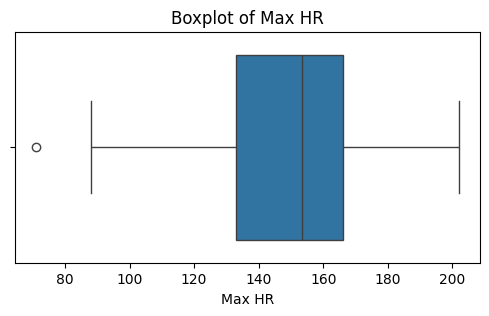

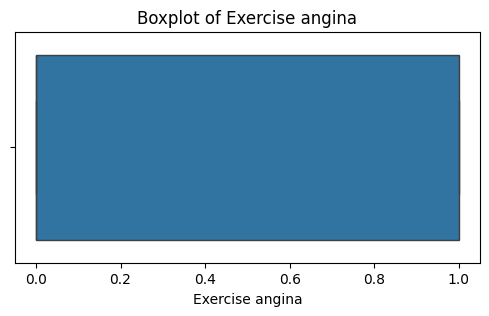

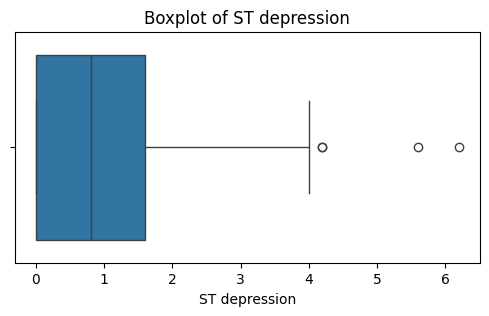

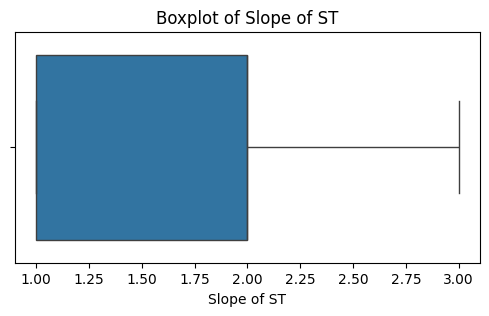

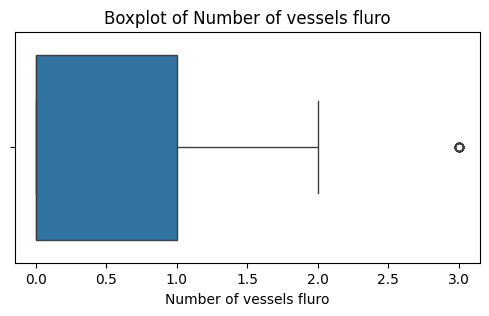

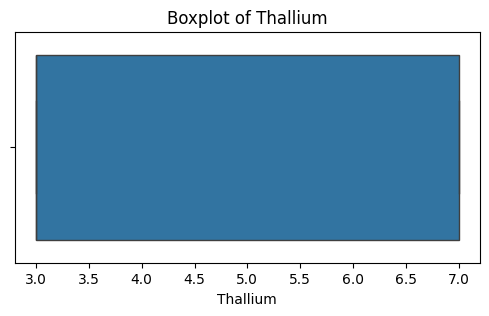

In [ ]:
for col in numeric_cols:
  plt.figure(figsize=(6,3))
  sns.boxplot(x=df[col])
  plt.title(f'Boxplot of {col}')
  plt.show()

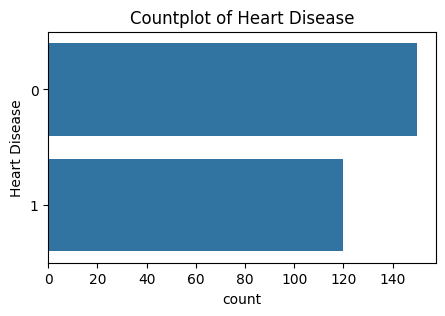

In [ ]:
for c in cat_cols:
  plt.figure(figsize=(5,3))
  sns.countplot(y=c, data=df)
  plt.title(f'Countplot of {c}')
  plt.show()

Categorical distributions

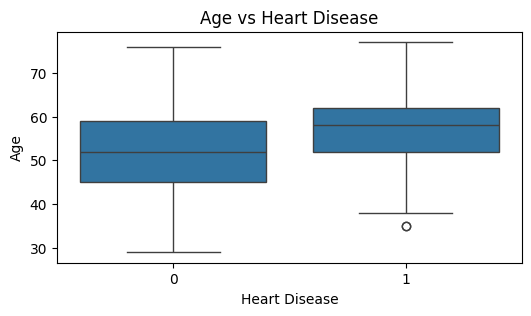

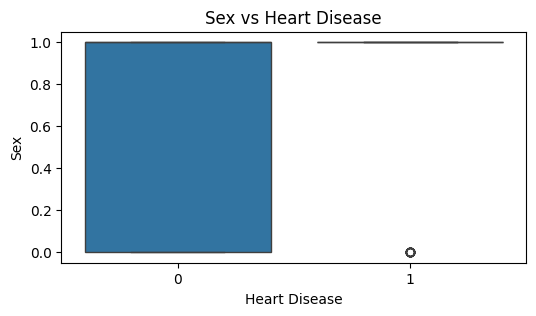

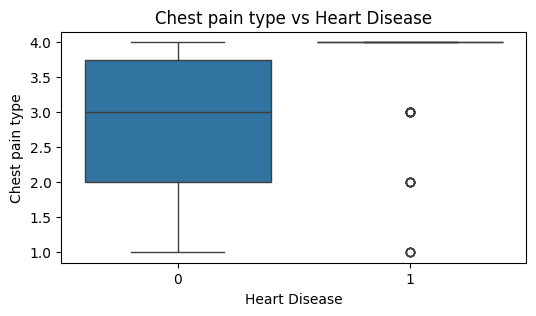

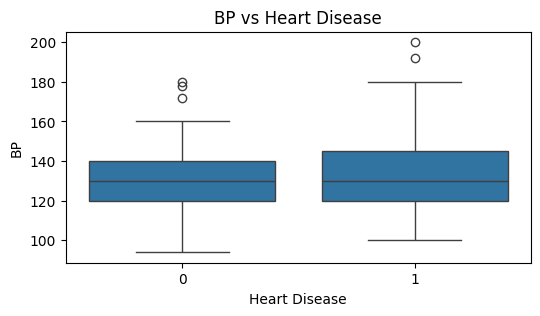

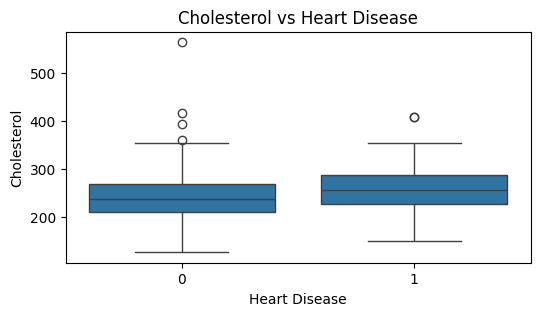

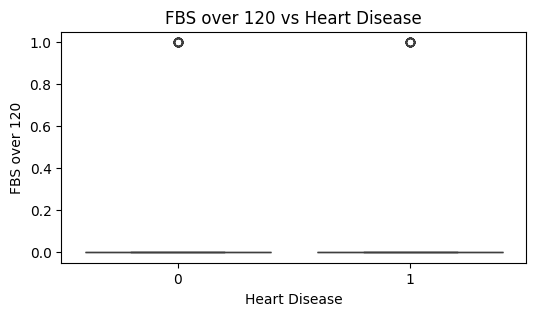

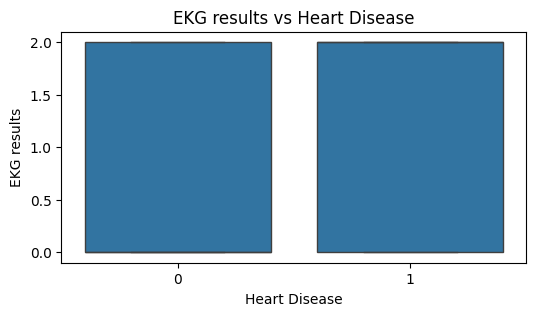

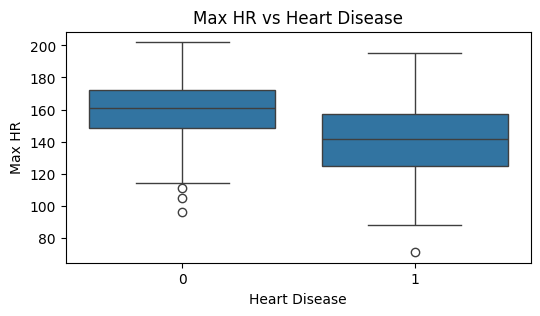

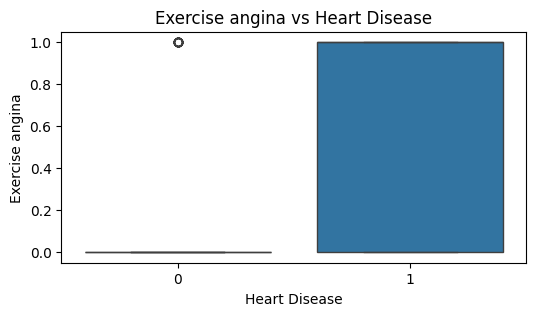

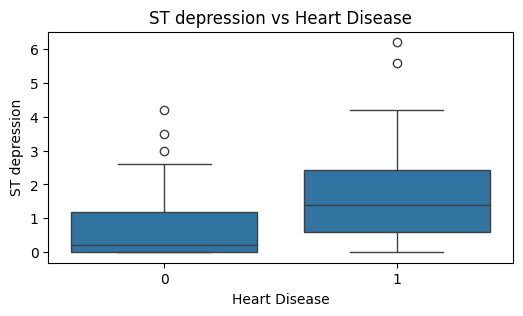

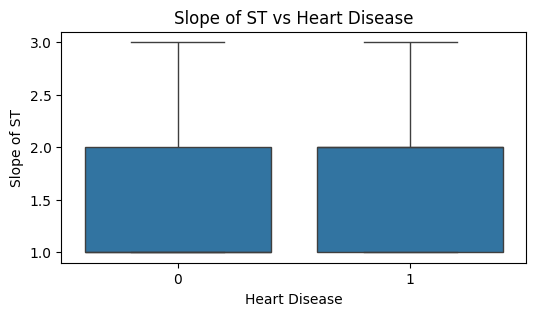

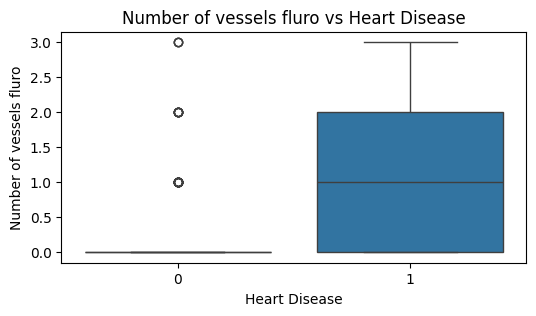

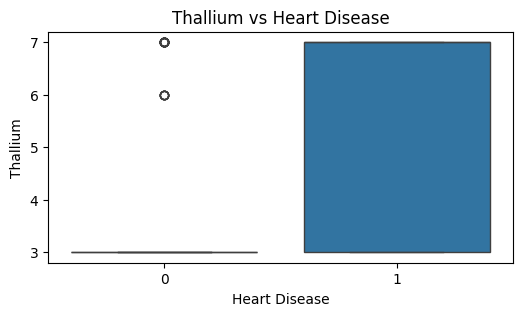

In [ ]:
# Numeric vs target
for col in numeric_cols:
  plt.figure(figsize=(6,3))
  sns.boxplot(x=target_col, y=col, data=df)
  plt.title(f'{col} vs {target_col}')
  plt.show()

Step 5: Skewness Check and Transformation

Check skewness of numerical features.

In [ ]:
# Check skewness
skewness = df[numeric_cols].skew().sort_values(ascending=False)
print('Skewness of numerical features:')
print(skewness)

Skewness of numerical features:
FBS over 120               1.991971
ST depression              1.262893
Number of vessels fluro    1.209890
Cholesterol                1.183721
Exercise angina            0.728915
BP                         0.722618
Slope of ST                0.543151
Thallium                   0.287268
EKG results               -0.044703
Age                       -0.163615
Max HR                    -0.527737
Sex                       -0.765084
Chest pain type           -0.878767
dtype: float64


Distributions before transformation:


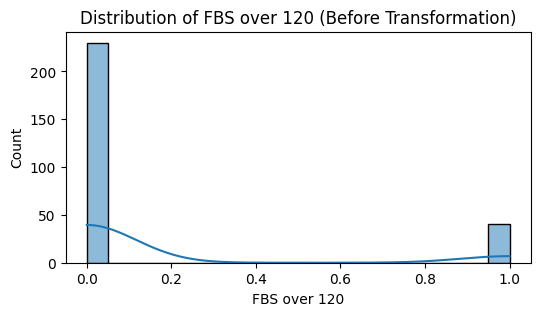

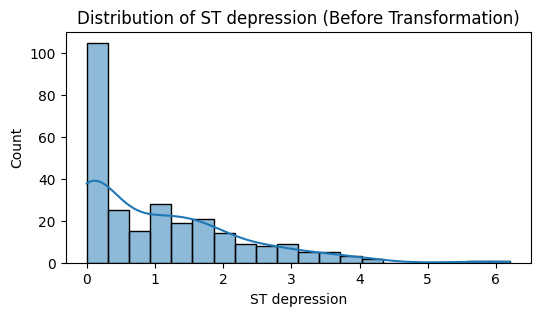

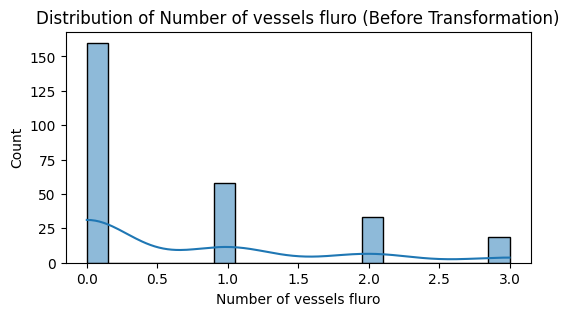

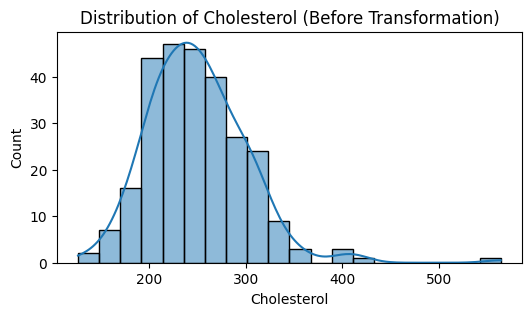

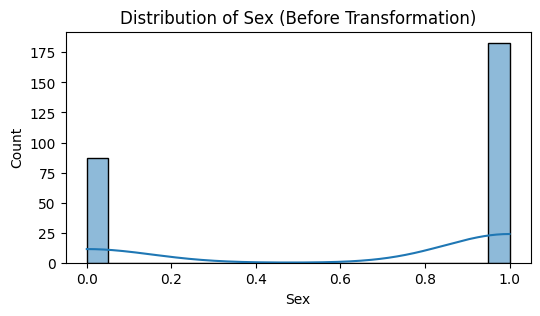

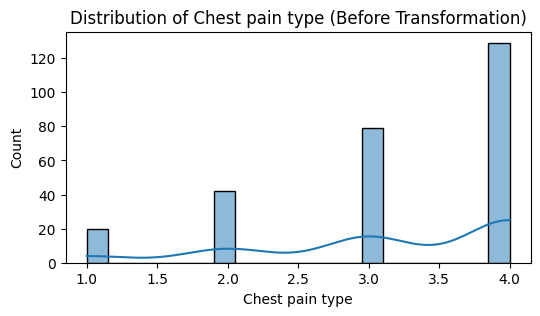

In [ ]:
# Create a copy of the original dataframe to show distributions before transformation
df_original = pd.read_csv('/content/Heart_Disease_Prediction.csv')

print('Distributions before transformation:')
for feature in skewed_features:
    plt.figure(figsize=(6,3))
    sns.histplot(df_original[feature], kde=True, bins=20)
    plt.title(f'Distribution of {feature} (Before Transformation)')
    plt.show()

Visualize distributions before and after skewness transformation.

Apply transformation to skewed features (e.g., log transformation or square root transformation).

In [ ]:
# Apply transformation
skew_threshold = 0.75
skewed_features = skewness[abs(skewness) > skew_threshold].index

for feature in skewed_features:
    # Apply log transformation if skewness is positive, otherwise apply square root
    if skewness[feature] > 0:
        df[feature] = np.log1p(df[feature])
    else:
        df[feature] = np.sqrt(df[feature])

print(f'\nApplied transformation to the following features: {list(skewed_features)}')

# Re-check skewness after transformation
print('\nSkewness of numerical features after transformation:')
print(df[numeric_cols].skew().sort_values(ascending=False))


Applied transformation to the following features: ['FBS over 120', 'ST depression', 'Number of vessels fluro', 'Cholesterol', 'Sex', 'Chest pain type']

Skewness of numerical features after transformation:
FBS over 120               1.991971
Number of vessels fluro    0.770163
Exercise angina            0.728915
BP                         0.722618
Slope of ST                0.543151
ST depression              0.350417
Thallium                   0.287268
Cholesterol                0.093598
EKG results               -0.044703
Age                       -0.163615
Max HR                    -0.527737
Sex                       -0.765084
Chest pain type           -1.186382
dtype: float64



Distributions after transformation:


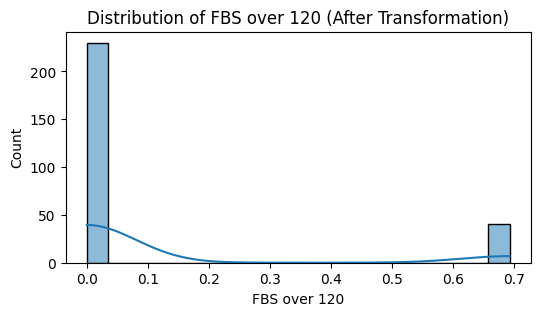

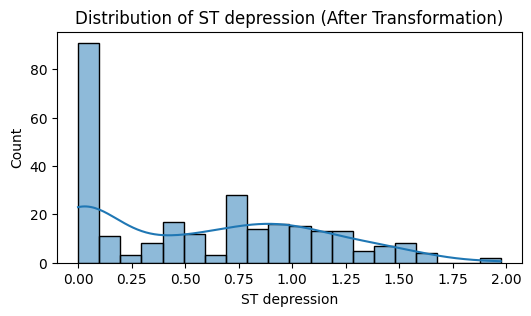

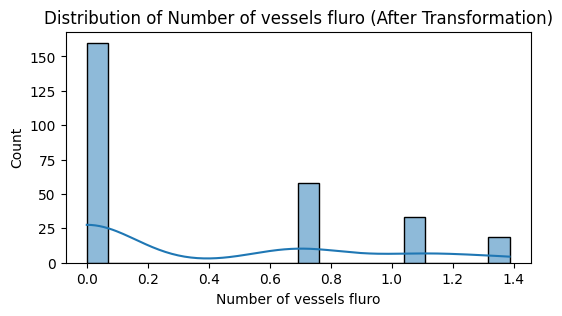

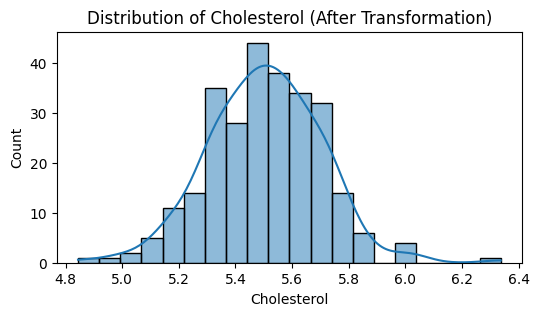

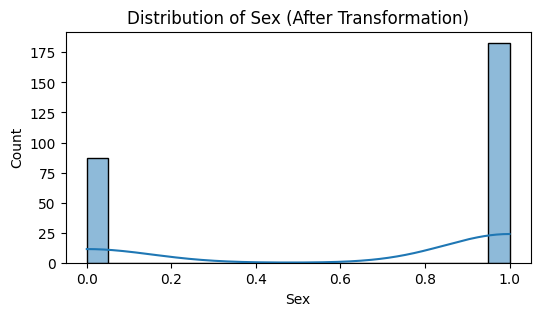

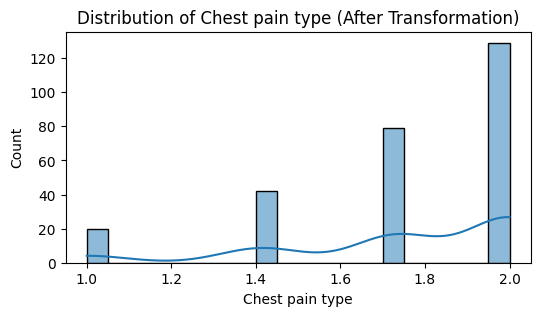

In [ ]:

print('\nDistributions after transformation:')
for feature in skewed_features:
    plt.figure(figsize=(6,3))
    sns.histplot(df[feature], kde=True, bins=20)
    plt.title(f'Distribution of {feature} (After Transformation)')
    plt.show()

Step 6: Outlier Detection and Removal

Identify and remove outliers from numerical features using the IQR method.

In [ ]:
# Outlier detection and removal using IQR
print("Shape before outlier removal:", df.shape)

Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

# Define a threshold (e.g., 1.5 * IQR)
outlier_threshold = 1.5

# Identify outliers
outlier_condition = (df[numeric_cols] < (Q1 - outlier_threshold * IQR)) | (df[numeric_cols] > (Q3 + outlier_threshold * IQR))
outliers_indices = df[outlier_condition.any(axis=1)].index

# Remove outliers
df_cleaned = df.drop(outliers_indices)

print("Shape after outlier removal:", df_cleaned.shape)
print(f"\nRemoved {len(outliers_indices)} outliers.")

Shape before outlier removal: (270, 17)
Shape after outlier removal: (208, 17)

Removed 62 outliers.


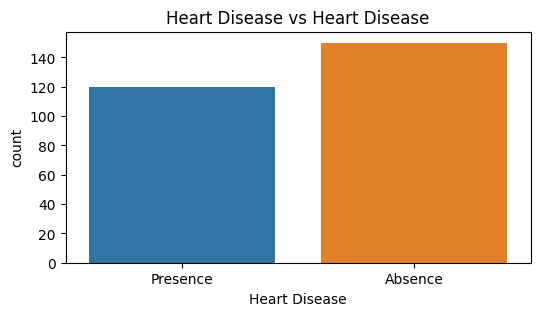

In [ ]:

# Categorical vs target
for c in cat_cols:
  plt.figure(figsize=(6,3))
sns.countplot(x=c, hue=target_col, data=df)
plt.title(f'{c} vs {target_col}')
plt.show()




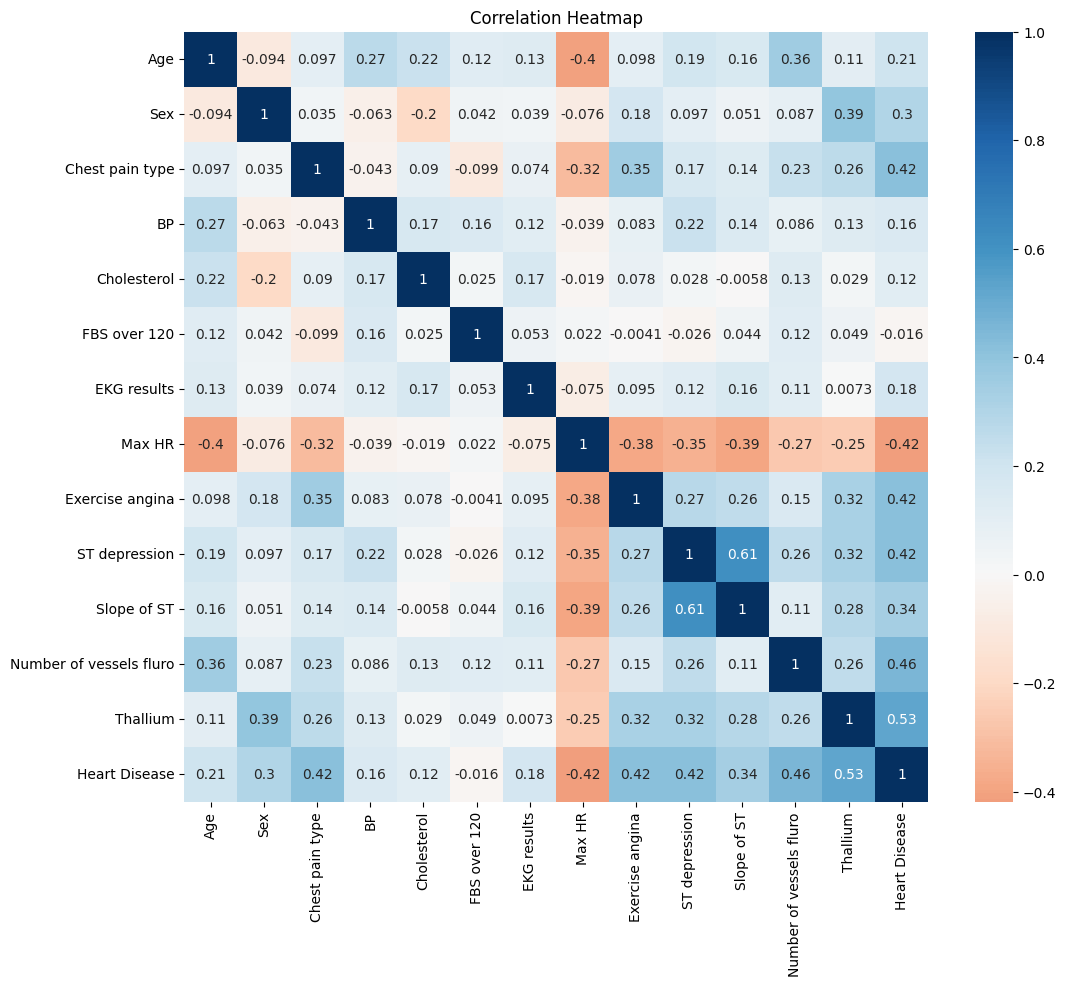

In [ ]:
# Correlation heatmap
plt.figure(figsize=(12,10))
# Convert the target column to numerical values
df['Heart Disease'] = df['Heart Disease'].map({'Absence': 0, 'Presence': 1})
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='RdBu', center=0)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# Handle missing values
df.fillna(df.median(), inplace=True)
if 'Age' in df.columns:
  df['age_group'] = pd.cut(df['Age'], bins=[0,30,40,50,60,70,100], labels=['<30','30-40','40-50','50-60','60-70','70+'])
if 'Cholesterol' in df.columns and 'Age' in df.columns:
  df['chol_age_ratio'] = df['Cholesterol'] / (df['Age'] + 1)
if 'BP' in df.columns and 'Max HR' in df.columns:
  df['bp_heart_rate_ratio'] = df['BP'] / (df['Max HR'] + 1)


print('\nNew engineered features added:')
print([c for c in df.columns if c not in numeric_cols + cat_cols + [target_col]])


New engineered features added:
['age_group', 'chol_age_ratio', 'bp_heart_rate_ratio']


In [ ]:
# Encoding categorical variables
df = pd.get_dummies(df, columns=df.select_dtypes(include='object').columns, drop_first=True)


print('\nFinal dataset shape after feature engineering:', df.shape)


Final dataset shape after feature engineering: (270, 17)


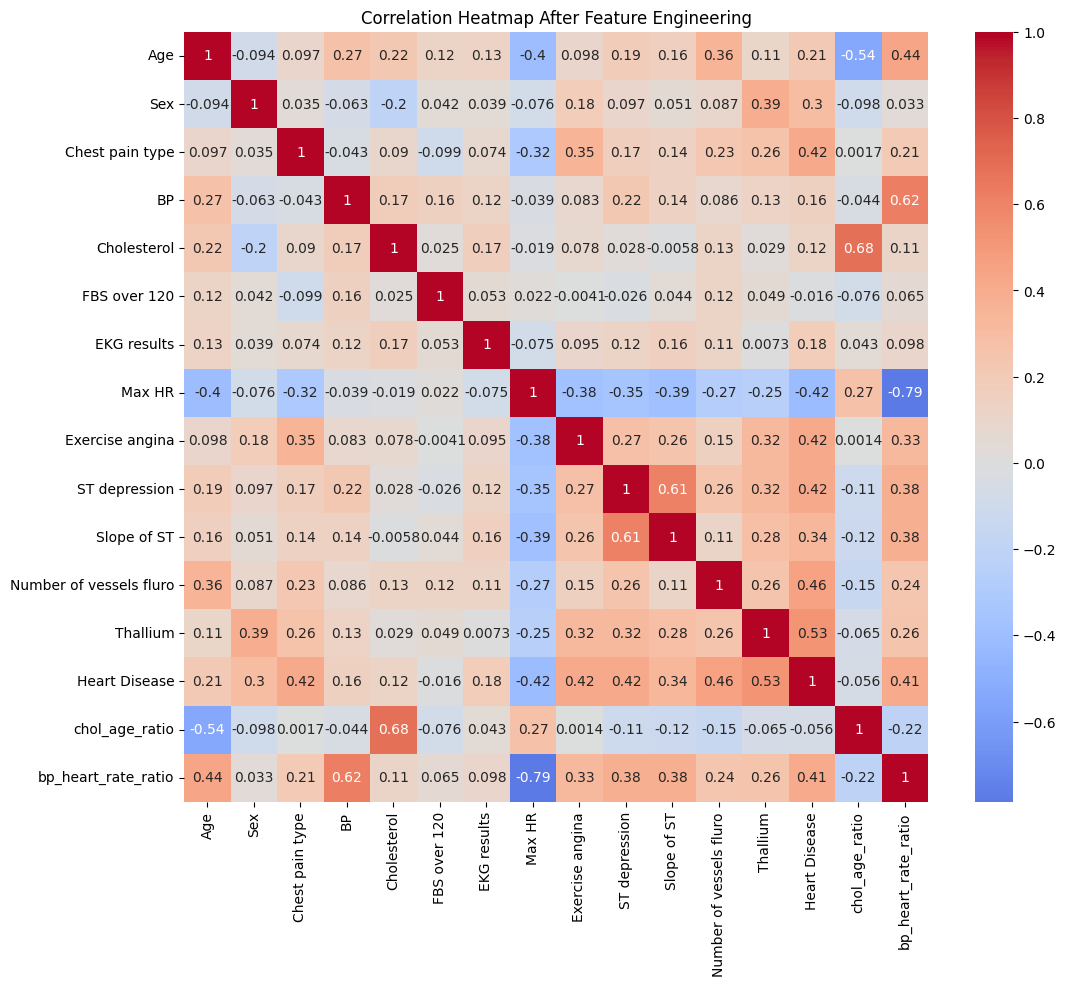


EDA and Feature Engineering completed successfully.


In [ ]:
# Correlation after feature engineering
plt.figure(figsize=(12,10))
# Calculate correlation on the updated df DataFrame
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap After Feature Engineering')
plt.show()


print('\nEDA and Feature Engineering completed successfully.')

In [ ]:
df_cleaned.shape

(208, 17)